# First Try for Model: Decision Tree Regressor
This notebook documents our first process of approaching the given regression task using a DecisionTreeRegressor. The following approaches are documented:
* paramter optimization using GridSearchCV
* paramter optimization while analysing each parameter on their own
* each of the mentioned approaches is tried with K-Fold CrossValidation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import data_preprocessing

In [6]:
# import preprocessed data
train, test = data_preprocessing.preprocess_data("Residual Load Dataset.csv")

In [7]:
# separate features from target variable
def split_x_y(df):
    y = df["Residual Load"]
    X = df.drop("Residual Load", axis=1)
    return X, y

X_train, y_train = split_x_y(train)
X_test, y_test = split_x_y(test)

## Setting a Baseline
First, we need to create a baseline to compare our RMSE findings to

In [8]:
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

RMSE:  15102.487743141772
NRMSE:  0.22299394240235318


## Analysing Each Hyperparameter
Now, we jump into looking at the performance of the model with only one hyperparameter being activly tuned: starting with the maximum depth of the tree

In [9]:
# Create the parameter grid based on inital values
gridParams = {
    'max_depth': range(1, 32),
    # 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'max_depth': 7}
Best Score (MSE):  -110961404.10987921
RMSE:  10601.894510422515
NRMSE:  0.15654098146092366


### Minimum Number of Samples Required to be at a Leaf Node

In [10]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'min_samples_leaf': 0.01}
Best Score (MSE):  -109303147.16335142
RMSE:  10320.493152201208
NRMSE:  0.15238598399730102


### Minimum Number of Samples Required to Split an Internal Node

In [11]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pack

Best Parameters:  {'min_samples_split': 0.05}
Best Score (MSE):  -111226618.36187872
RMSE:  10607.243436561826
NRMSE:  0.15661996037802065


### Number of Features to Consider for the Best Split

In [12]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    'max_features': range(2,8),
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'max_features': 7}
Best Score (MSE):  -189600435.1548462
RMSE:  14573.516945604053
NRMSE:  0.21518348855098562


### CCP_Alpha for Pruning

In [13]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, .14, .16, .18, .2],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'ccp_alpha': 0.02}
Best Score (MSE):  -189917282.61815977
RMSE:  15102.55063045629
NRMSE:  0.22299487095733234


### Maximum of Leaf Nodes of Each Tree

In [14]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': range(30,70),
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'max_leaf_nodes': 69}
Best Score (MSE):  -111014218.52582832
RMSE:  10407.989485556662
NRMSE:  0.15367790044527452


### Minimum of Impurity Decrease for Splitting a Node

In [15]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease': [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, .62, .63, .64, .65, .66, .67, .68, .69, .7],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'min_impurity_decrease': 0.7}
Best Score (MSE):  -188474352.55270776
RMSE:  15888.468291162566
NRMSE:  0.2345992424056133


### Minimum Weighted Fraction of Total of Weights required to be at a Leaf Node

In [16]:
# Create the parameter grid based on inital values
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, .006, .007, .008, .009, .01, .011, .012, .013, .014, .015, .016, .017, .018, .019, .02] 
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'min_weight_fraction_leaf': 0.006}
Best Score (MSE):  -106877093.59565781
RMSE:  10367.83123299551
NRMSE:  0.1530849486607139


### Trying out Different Combination of Parameters

In [17]:
# Create the parameter grid based on narrowed ranges
gridParams = {
    'min_samples_leaf': np.linspace(0.01, 0.1, 10),
    'min_samples_split': np.linspace(0.01, 0.1, 10),
    'max_depth': range(5,7),
    #'min_samples_leaf': [0.0, 0.01, 0.02],
    #'min_samples_split': [0.03, 0.04, 0.05],
    'max_features': [9,10,11],
    #'ccp_alpha': [0.66],
    'ccp_alpha': [0.05, 0.1, 0.15],
    'max_leaf_nodes': range(44, 46),
    'min_impurity_decrease': [0.0, 0.25, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02] 
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'ccp_alpha': 0.05, 'max_depth': 6, 'max_features': 11, 'max_leaf_nodes': 44, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}
Best Score (MSE):  -110309797.3719066
RMSE:  10403.679445230136
NRMSE:  0.15361426107004897


In [18]:
# Create the parameter grid based on best results from previous grid searches
gridParams = {
    'min_samples_leaf': [0.01],
    'min_samples_split': [0.01],
    'max_depth': [6],
    'max_features': [9],
    'ccp_alpha': [0.05],
    'max_leaf_nodes': [45],
    'min_impurity_decrease': [0.0],
    'min_weight_fraction_leaf': [0.0] 
}

# Create the DT Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSeachCV instance
gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Hyperparameter Optimization: Fit the GridSeachCV instance to the training data
gridSearch.fit(X_train, y_train)

# Get the best estimator
bestRegressor = gridSearch.best_estimator_

# Fit the best estimator to the training data
bestRegressor.fit(X_train, y_train)

# Predict on the test data
y_pred = bestRegressor.predict(X_test)

# Evaluate the model
print("Best Parameters: ", gridSearch.best_params_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("NRMSE: ", sqrt(mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Best Parameters:  {'ccp_alpha': 0.05, 'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}
Best Score (MSE):  -110854818.19742182
RMSE:  10457.893939584608
NRMSE:  0.15441475857993398


### Plotting the Tree

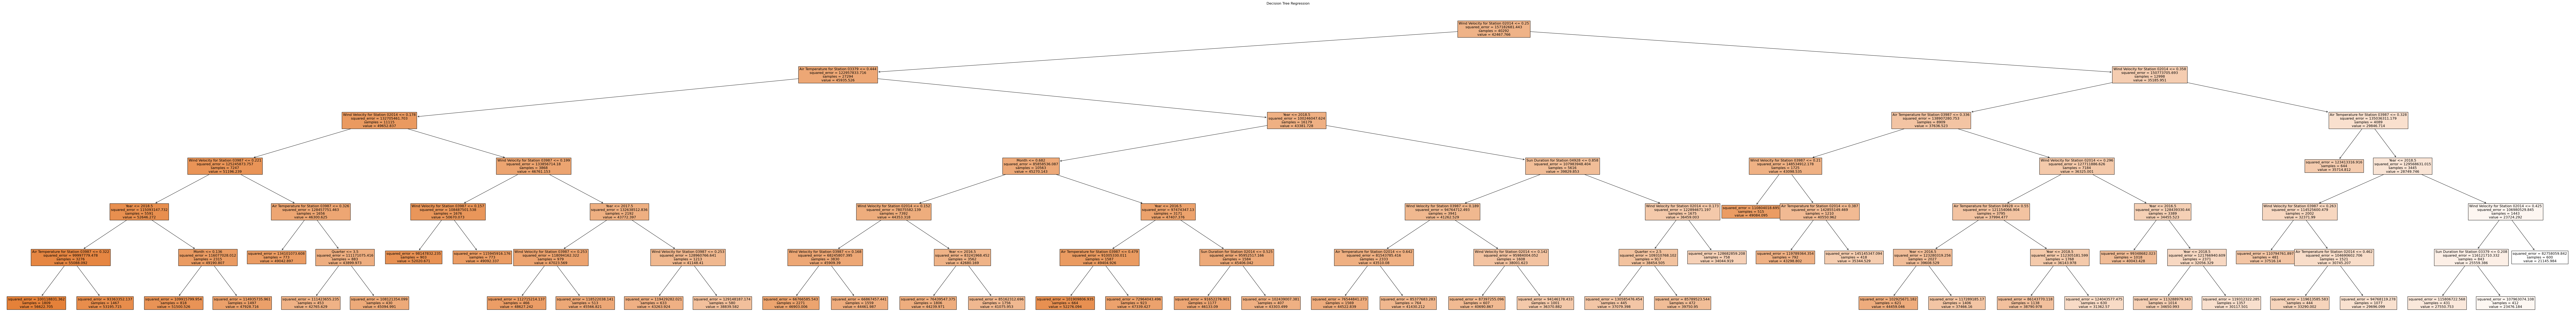

In [19]:
# Get the feature names as a list
feature_names = list(X_train.columns)

# Plot the Decision Tree
plt.figure(figsize=(160,20))
plot_tree(bestRegressor, filled=True, feature_names=feature_names, fontsize=12)
plt.title("Decision Tree Regression")
plt.show()